# Comparison of disorder categories according to iupred-short

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/')

import aepathdisorder as aepd

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Load aggregated iupred-short data
protdf = aepd.load_multi_tables('../data/iupred_agg-clas/proteomes/*/', regex='*short*.table')
EHECdf = aepd.load_multi_tables('../data/iupred_agg-clas/EHEC_effectors/', regex='*short*.table')
EPECdf = aepd.load_multi_tables('../data/iupred_agg-clas/EPEC_effectors/', regex='*short*.table')
CRdf = aepd.load_multi_tables('../data/iupred_agg-clas/CR_effectors/', regex='*short*.table')
humandf = aepd.load_multi_tables('../data/iupred_agg-clas/human/', regex='*short*.table')

In [3]:
# Calculate class frequencies
protclassfreq = aepd.calc_classfreq(protdf)
EHECclassfreq = aepd.calc_classfreq(EHECdf)
EPECclassfreq = aepd.calc_classfreq(EPECdf)
CRclassfreq = aepd.calc_classfreq(CRdf)
humanclassfreq = aepd.calc_classfreq(humandf)
# Summarize all results
summarydf = pd.concat([protclassfreq, EHECclassfreq, EPECclassfreq,CRclassfreq, humanclassfreq], axis=1)
summarydf.columns = ['A/E pathogens proteomes', 'EHEC effectors', 'EPEC effectors', 'CR effectors', 'Human proteome']
summarydf.to_csv('../data/iupred_agg-clas/class_frequencies_iupred-short.tsv',
sep='\t', index_label='Class', float_format='%.3f')

In [4]:
summarydf

,A/E pathogens proteomes,EHEC effectors,EPEC effectors,CR effectors,Human proteome
IDP,0.027270,0.076923,0.08,0.071429,0.262125
PDR,0.061531,0.076923,0.12,0.035714,0.165537
FRAG,0.016957,0.000000,0.00,0.000000,0.056908
NDP,0.170681,0.128205,0.28,0.178571,0.203547
ORD,0.723560,0.717949,0.52,0.714286,0.311883


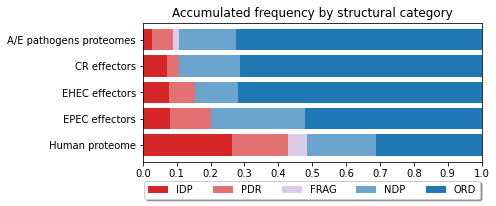

In [5]:
fig=plt.figure(figsize=(7,3))

ax = fig.add_subplot(111)

ax.barh('Human proteome', summarydf['Human proteome']['IDP'], 
        color='C3')
ax.barh('Human proteome', summarydf['Human proteome']['PDR'], 
        left = summarydf['Human proteome'].cumsum()['IDP'],
        color='C3', 
        alpha = 0.66)
ax.barh('Human proteome', summarydf['Human proteome']['FRAG'], 
        left = summarydf['Human proteome'].cumsum()['PDR'],
        color='C4',
        alpha=0.33)
ax.barh('Human proteome', summarydf['Human proteome']['NDP'],
        left = summarydf['Human proteome'].cumsum()['FRAG'],
        color='C0',
        alpha=0.66)
ax.barh('Human proteome', summarydf['Human proteome']['ORD'],
        left = summarydf['Human proteome'].cumsum()['NDP'],
        color='C0')

ax.barh('EPEC effectors', summarydf['EPEC effectors']['IDP'], 
        color='C3')
ax.barh('EPEC effectors', summarydf['EPEC effectors']['PDR'], 
        left = summarydf['EPEC effectors'].cumsum()['IDP'], 
        color='C3',
        alpha = 0.66)
ax.barh('EPEC effectors', summarydf['EPEC effectors']['FRAG'], 
        left = summarydf['EPEC effectors'].cumsum()['PDR'],
        color='C4',
        alpha=0.33)
ax.barh('EPEC effectors', summarydf['EPEC effectors']['NDP'], 
        left = summarydf['EPEC effectors'].cumsum()['FRAG'], 
        color='C0',
        alpha = 0.66)
ax.barh('EPEC effectors', summarydf['EPEC effectors']['ORD'], 
        left = summarydf['EPEC effectors'].cumsum()['NDP'], 
        color='C0')

ax.barh('EHEC effectors', summarydf['EHEC effectors']['IDP'], 
        color='C3')
ax.barh('EHEC effectors', summarydf['EHEC effectors']['PDR'], 
        left = summarydf['EHEC effectors'].cumsum()['IDP'], 
        color='C3',
        alpha = 0.66)
ax.barh('EHEC effectors', summarydf['EHEC effectors']['FRAG'], 
        left = summarydf['EHEC effectors'].cumsum()['PDR'],
        color='C4',
        alpha=0.33)
ax.barh('EHEC effectors', summarydf['EHEC effectors']['NDP'], 
        left = summarydf['EHEC effectors'].cumsum()['FRAG'], 
        color='C0',
        alpha = 0.66)
ax.barh('EHEC effectors', summarydf['EHEC effectors']['ORD'], 
        left = summarydf['EHEC effectors'].cumsum()['NDP'], 
        color='C0')

ax.barh('CR effectors', summarydf['CR effectors']['IDP'], 
        color='C3')
ax.barh('CR effectors', summarydf['CR effectors']['PDR'], 
        left = summarydf['CR effectors'].cumsum()['IDP'], 
        color='C3',
        alpha = 0.66)
ax.barh('CR effectors', summarydf['CR effectors']['FRAG'], 
        left = summarydf['CR effectors'].cumsum()['PDR'],
        color='C4',
        alpha=0.33)
ax.barh('CR effectors', summarydf['CR effectors']['NDP'], 
        left = summarydf['CR effectors'].cumsum()['FRAG'], 
        color='C0',
        alpha = 0.66)
ax.barh('CR effectors', summarydf['CR effectors']['ORD'], 
        left = summarydf['CR effectors'].cumsum()['NDP'], 
        color='C0')

ax.barh('A/E pathogens proteomes', summarydf['A/E pathogens proteomes']['IDP'], 
        color='C3')
ax.barh('A/E pathogens proteomes', summarydf['A/E pathogens proteomes']['PDR'], 
        left = summarydf['A/E pathogens proteomes'].cumsum()['IDP'],
        color='C3', 
        alpha = 0.66)
ax.barh('A/E pathogens proteomes', summarydf['A/E pathogens proteomes']['FRAG'], 
        left = summarydf['A/E pathogens proteomes'].cumsum()['PDR'],
        color='C4',
        alpha=0.33)
ax.barh('A/E pathogens proteomes', summarydf['A/E pathogens proteomes']['NDP'],
        left = summarydf['A/E pathogens proteomes'].cumsum()['FRAG'],
        color='C0',
        alpha=0.66)
ax.barh('A/E pathogens proteomes', summarydf['A/E pathogens proteomes']['ORD'],
        left = summarydf['A/E pathogens proteomes'].cumsum()['NDP'],
        color='C0')

ax.set_xlim(0,1)
ax.set_xticks(np.arange(0,1.1,0.1))

# ax.plot(angles, paifrequencies, 'o-', linewidth=2)
# ax.fill(angles, paifrequencies, alpha=0.25)


ax.set_title('Accumulated frequency by structural category')
categories = ["IDP", "PDR", "FRAG", "NDP", "ORD"]
ax.legend(categories, loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.tight_layout()

plt.savefig('../figures/stackedhbar_all-proteomes_vs_all-effectors_iupred-short.png',
            dpi=300)
